In [14]:
# Use ! to run a terminal command

# ! pip3 install wavio 
# ! pip3 install librosa
# ! pip3 install sounddevice

In [15]:
# import necessary modules
import sounddevice as sd
from scipy.io.wavfile import write
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
import numpy as np

In [16]:
# Define Sampling Rate or Frequency in Hz
sr = 44100

# Record duration in seconds
duration = 5

In [17]:
# Start audio recording
recording = sd.rec(int(duration*sr), samplerate=sr, channels=2) # we will record with a  mono or stereo channel microphone

# Record audio for the given duration
print("recording...............")
sd.wait()

# Write it to a file
write(r"C:\Users\jlkbo\Documents\ECE\2312\Project 1\Project 1\example.wav",sr,recording)

recording...............


recording shape (110250,)
sampling rate 22050


Text(0.5, 1.0, 'Waveform for First Phrase')

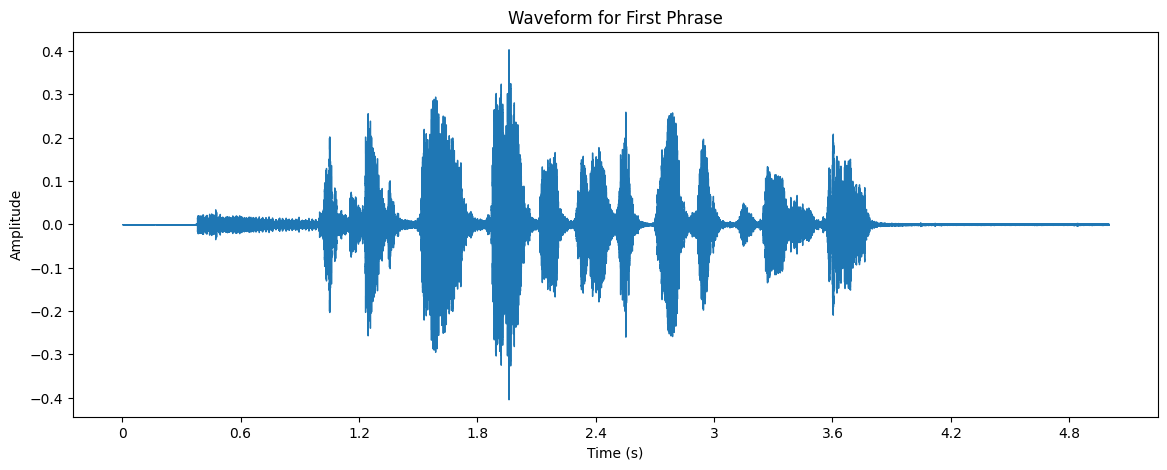

In [18]:
# Code to generate the sound signal for the first phrase
x, sr = librosa.load(r'C:\Users\jlkbo\Documents\ECE\2312\Project 1\Project 1\sound1.wav')
print("recording shape", x.shape)
print("sampling rate", sr)

plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveform for First Phrase')

(1025, 216)


Text(0, 0.5, 'Frequency (Hz)')

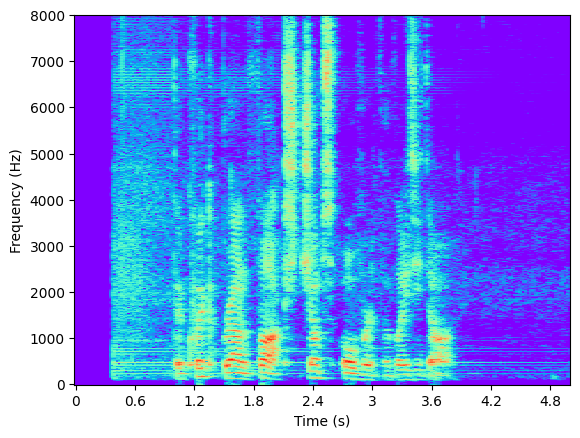

In [19]:
#This is the code for the spectrogram of the first phrase
freq = librosa.amplitude_to_db(np.abs(librosa.stft(x)), ref=np.max)
print(freq.shape)
librosa.display.specshow(freq, y_axis='linear', x_axis='time', sr=sr, cmap ='rainbow')
plt.axis(ymax=8000)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')


recording shape (110250,)
sampling rate 22050


Text(0.5, 1.0, 'Waveform for Second Phrase')

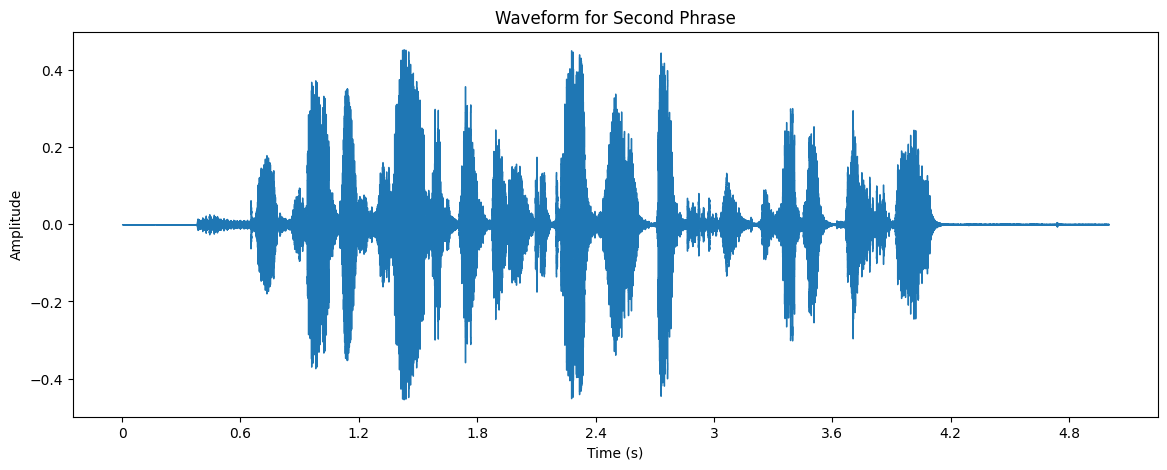

In [20]:
# Look at the discrete number array we got from the audio
x, sr = librosa.load(r'C:\Users\jlkbo\Documents\ECE\2312\Project 1\Project 1\sound2.wav')
print("recording shape", x.shape)
print("sampling rate", sr)
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveform for Second Phrase')

(1025, 216)


Text(0, 0.5, 'Frequency (Hz)')

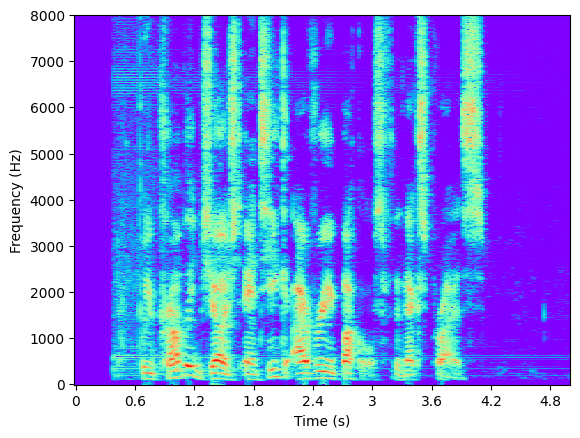

In [21]:
#This is the code for the spectrogram of the second phrase
freq = librosa.amplitude_to_db(np.abs(librosa.stft(x)), ref=np.max)
print(freq.shape)
librosa.display.specshow(freq, y_axis='linear', x_axis='time', sr=sr, cmap ='rainbow')
plt.axis(ymax=8000)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')


recording shape (110250,)
sampling rate 22050


Text(0.5, 1.0, 'Waveform for Third Phrase')

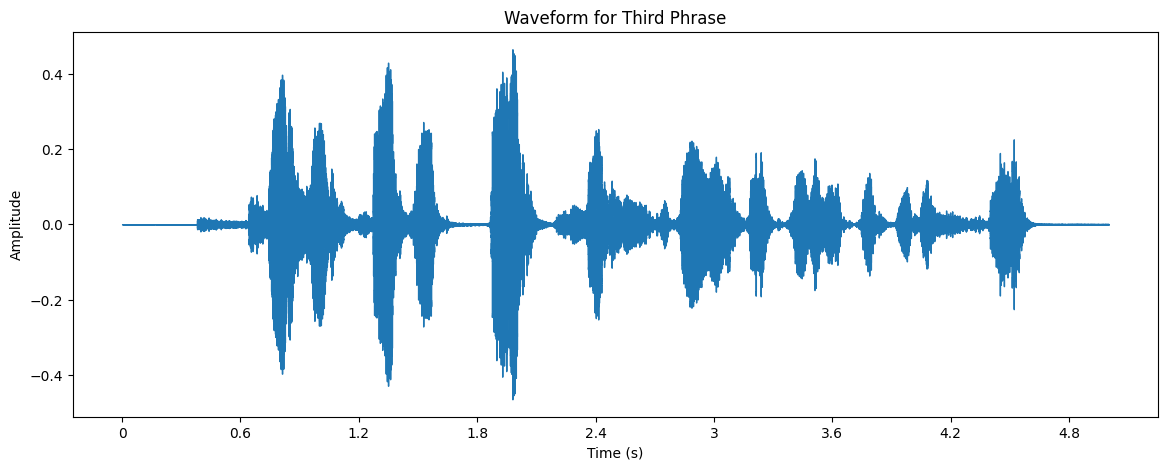

In [22]:
# Look at the discrete number array we got from the audio
x, sr = librosa.load(r'C:\Users\jlkbo\Documents\ECE\2312\Project 1\Project 1\sound3.wav')
print("recording shape", x.shape)
print("sampling rate", sr)
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveform for Third Phrase')

(1025, 216)


Text(0, 0.5, 'Frequency (Hz)')

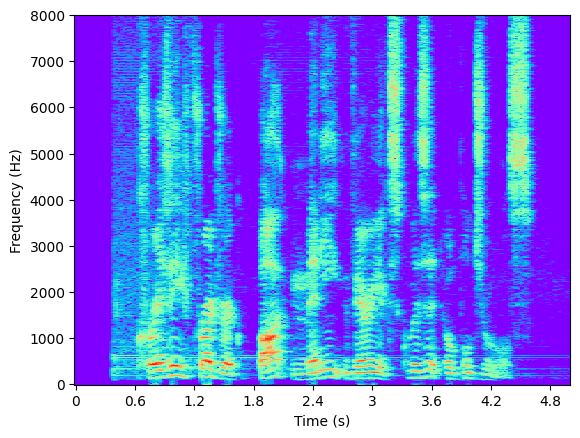

In [23]:
#This is the code for the spectrogram of the third phrase
freq = librosa.amplitude_to_db(np.abs(librosa.stft(x)), ref=np.max)
print(freq.shape)
librosa.display.specshow(freq, y_axis='linear', x_axis='time', sr=sr, cmap ='rainbow')
plt.axis(ymax=8000)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')


In [24]:
# This is the code for creating sample delay wav files
x_stereo, sr = librosa.load(r'C:\Users\jlkbo\Documents\ECE\2312\Project 1\Project 1\sound1.wav', mono = False)
delay = 0 #Change this line for whatever delay in samples is desired
x_first = np.pad(x_stereo[0],pad_width=(0,delay),mode='constant')
x_second = np.pad(x_stereo[0],pad_width=(delay,0),mode='constant')
new_stereo = np.vstack([x_first, x_second])
print(x_first)
print(x_second)
print(new_stereo.T)
print(x_stereo)
write('teamJKBandJTM-stereosoundfile-0ms.wav',sr,new_stereo.T) #

[ 0.0000000e+00 -3.0517578e-05  0.0000000e+00 ...  1.5258789e-04
 -1.5258789e-04 -3.3569336e-04]
[ 0.0000000e+00 -3.0517578e-05  0.0000000e+00 ...  1.5258789e-04
 -1.5258789e-04 -3.3569336e-04]
[[ 0.0000000e+00  0.0000000e+00]
 [-3.0517578e-05 -3.0517578e-05]
 [ 0.0000000e+00  0.0000000e+00]
 ...
 [ 1.5258789e-04  1.5258789e-04]
 [-1.5258789e-04 -1.5258789e-04]
 [-3.3569336e-04 -3.3569336e-04]]
[[ 0.0000000e+00 -3.0517578e-05  0.0000000e+00 ...  1.5258789e-04
  -1.5258789e-04 -3.3569336e-04]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  1.2207031e-04
  -1.5258789e-04 -3.0517578e-04]]


In [25]:
# This is the code for attenuating a sound file
x_stereo, sr = librosa.load(r'C:\Users\jlkbo\Documents\ECE\2312\Project 1\Project 1\sound1.wav', mono = False)
delay = 24 #Change this line for whatever delay in samples is desired
x_first = np.pad(x_stereo[0],pad_width=(0,delay),mode='constant')
x_second = np.pad(x_stereo[0],pad_width=(delay,0),mode='constant')
x_second *= 0.25 # 0.71 = -1.5dB, 0.5 = -3dB, 0.25 = -6 dB
new_stereo = np.vstack([x_first, x_second])
print(x_first)
print(x_second)
print(new_stereo.T)
print(x_stereo)
write('teamJKBandJTM-stereosoundfile-avghead-6dB.wav',sr,new_stereo.T) #

[ 0.0000000e+00 -3.0517578e-05  0.0000000e+00 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  3.8146973e-05
 -3.8146973e-05 -8.3923340e-05]
[[ 0.0000000e+00  0.0000000e+00]
 [-3.0517578e-05  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00]
 ...
 [ 0.0000000e+00  3.8146973e-05]
 [ 0.0000000e+00 -3.8146973e-05]
 [ 0.0000000e+00 -8.3923340e-05]]
[[ 0.0000000e+00 -3.0517578e-05  0.0000000e+00 ...  1.5258789e-04
  -1.5258789e-04 -3.3569336e-04]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  1.2207031e-04
  -1.5258789e-04 -3.0517578e-04]]
